### Project 6

#### 1. Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### 2. Read the csv file

In [2]:
df = pd.read_csv("../project6/CSV/amazon.csv")

In [3]:
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


#### 3. Check data type of each column

In [4]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

##### Convert date column type from object to datetime

In [5]:
df = pd.read_csv("../project6/CSV/amazon.csv", parse_dates=['date'])

In [6]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

4. Display top 5 rows of the dataset.

In [7]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


5. Check the last 5 rows.

In [8]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


6. Find the shape of our dataset (number of rows and number of columns).

In [9]:
row_count = df.shape[0]
print(f"Number of rows in dataframe: {row_count}")

Number of rows in dataframe: 6454


In [10]:
column_count = df.shape[1]
print(f"Number of columns in dataframe: {column_count}")

Number of columns in dataframe: 5


7. Getting information about our dataset like total number rows, total number of columns, datatypes of each column and memory requirement.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


8. Check for duplicate data and drop them.

In [12]:
duplicate_count = df.duplicated(subset=None, keep='first').sum()
print(f"Number of duplicates in dataframe: {duplicate_count}")

Number of duplicates in dataframe: 32


In [13]:
df = df.drop_duplicates()

In [14]:
new_duplicate_count = df.duplicated(subset=None, keep='first').sum()
print(f"Number of duplicates in dataframe: {new_duplicate_count}")

Number of duplicates in dataframe: 0


9. Check null values in the dataset.

In [15]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

10. Get overall statistics about the data frame.

In [16]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


11. Rename month names to english.

In [17]:
month_name = {"Janeiro":"January", "Fevereiro":"February", "Março":"March", "Abril":"April",
           "Maio":"May", "Junho":"June", "Julho":"July", "Agosto":"August", "Setembro":"September", 
           "Outubro":"October", "Novembro":"November", "Dezembro":"December"}

In [18]:
df['month'] = df['month'].map(month_name)

In [19]:
df['month'].value_counts()

month
August       540
September    540
October      540
November     540
June         539
July         539
January      535
February     535
April        534
May          533
December     513
Name: count, dtype: int64

12. Total number of fires registered.

In [20]:
total_fires = df['number'].sum().round(0)
print(f"Total Number of fires reported in dataset: {total_fires}")

Total Number of fires reported in dataset: 698811.0


13. In which month was the maximum number of forest fires reported?

In [43]:
fires_month = df.filter(['month', 'number'])
fires_month

,month,number
0,January,0.0
1,January,0.0
2,January,0.0
3,January,0.0
4,January,0.0
...,...,...
6449,December,128.0
6450,December,85.0
6451,December,223.0
6452,December,373.0


In [52]:
count_fires_month = fires_month.groupby(['month']).sum()
count_fires_month = count_fires_month.reset_index()
count_fires_month

,month,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,May,34725.363
8,November,85508.054
9,October,88681.579


Text(0.5, 1.0, 'Fire vs Month')

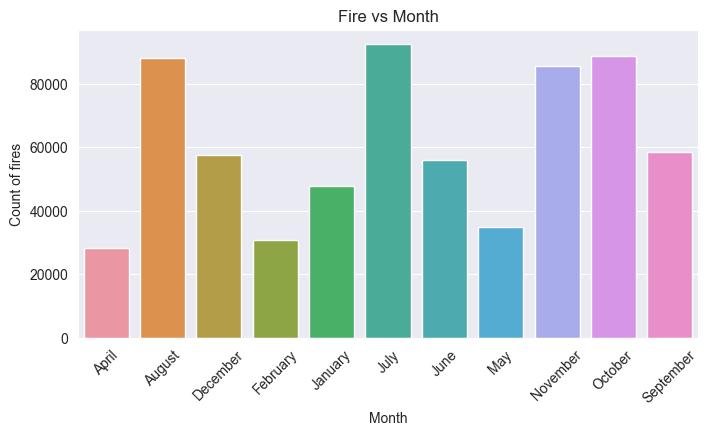

In [53]:
plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")
ax = sns.barplot(x='month', y="number", data=count_fires_month)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Month")
plt.ylabel("Count of fires")
plt.title("Fire vs Month")

14. In which year was the maximum number of forest fires reported?

In [54]:
fires_year = df.filter(['year', 'number'])
fires_year

,year,number
0,1998,0.0
1,1999,0.0
2,2000,0.0
3,2001,0.0
4,2002,0.0
...,...,...
6449,2012,128.0
6450,2013,85.0
6451,2014,223.0
6452,2015,373.0


In [56]:
count_fires_year = fires_year.groupby(['year']).sum()
count_fires_year = count_fires_year.reset_index()
count_fires_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


Text(0.5, 1.0, 'Fire vs Year')

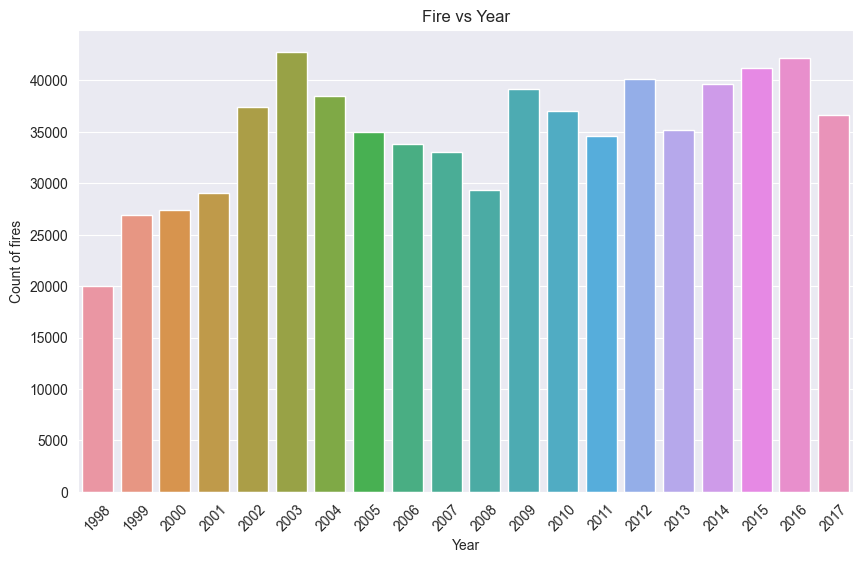

In [59]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x='year', y="number", data=count_fires_year)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Count of fires")
plt.title("Fire vs Year")

15. Which state has the maximum number of forest fires reported?

In [60]:
fires_year = df.filter(['state', 'number'])
fires_year

,state,number
0,Acre,0.0
1,Acre,0.0
2,Acre,0.0
3,Acre,0.0
4,Acre,0.0
...,...,...
6449,Tocantins,128.0
6450,Tocantins,85.0
6451,Tocantins,223.0
6452,Tocantins,373.0


In [61]:
count_fires_year = fires_year.groupby(['state']).sum()
count_fires_year = count_fires_year.reset_index()
count_fires_year

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


Text(0.5, 1.0, 'Fire vs State')

/Users/justinweible/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
/Users/justinweible/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


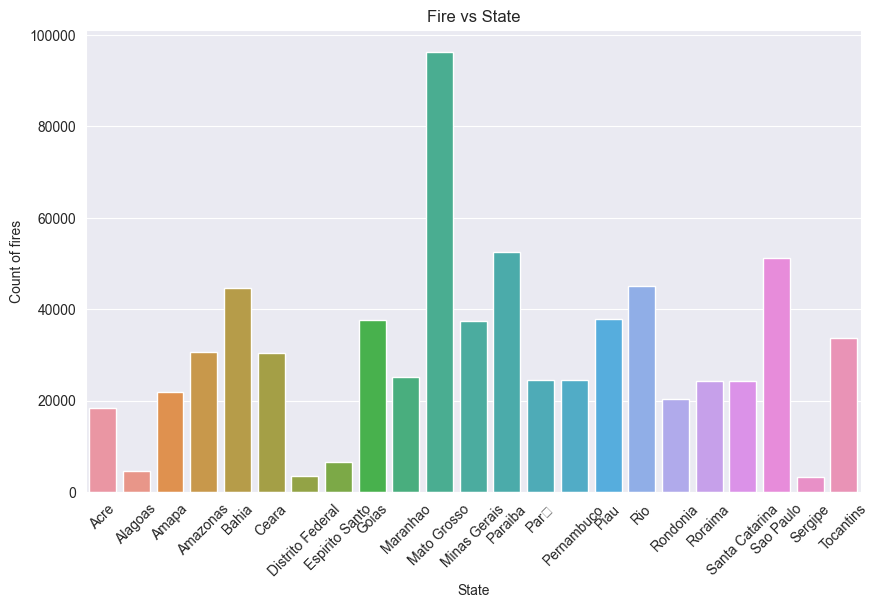

In [63]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x='state', y="number", data=count_fires_year)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("State")
plt.ylabel("Count of fires")
plt.title("Fire vs State")

16. Find total number of fires were reported in amazonas (state of brazil)

In [67]:
df['state'].value_counts()

state
Rio                 697
Mato Grosso         473
Paraiba             472
Acre                239
Par�                239
Sergipe             239
Sao Paulo           239
Santa Catarina      239
Roraima             239
Rondonia            239
Piau                239
Pernambuco          239
Minas Gerais        239
Alagoas             239
Maranhao            239
Goias               239
Espirito Santo      239
Distrito Federal    239
Ceara               239
Bahia               239
Amazonas            239
Amapa               239
Tocantins           239
Name: count, dtype: int64

In [68]:
amazonas_df = df[df['state'] == 'Amazonas']
amazonas_df

,year,state,month,number,date
718,1998,Amazonas,January,0.0,1998-01-01
719,1999,Amazonas,January,3.0,1999-01-01
720,2000,Amazonas,January,7.0,2000-01-01
721,2001,Amazonas,January,3.0,2001-01-01
722,2002,Amazonas,January,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,December,80.0,2012-01-01
953,2013,Amazonas,December,236.0,2013-01-01
954,2014,Amazonas,December,293.0,2014-01-01
955,2015,Amazonas,December,565.0,2015-01-01


In [70]:
total_amazonas_fires = amazonas_df['number'].sum()
print(f"Total number of fires in Amazonas: {total_amazonas_fires}")

Total number of fires in Amazonas: 30650.129


17. Display number of fires were reported in amazon (year-wise)

In [77]:
amazonas_year = amazonas_df.filter(['state', 'year', 'number'])
amazonas_year

,state,year,number
718,Amazonas,1998,0.0
719,Amazonas,1999,3.0
720,Amazonas,2000,7.0
721,Amazonas,2001,3.0
722,Amazonas,2002,17.0
...,...,...,...
952,Amazonas,2012,80.0
953,Amazonas,2013,236.0
954,Amazonas,2014,293.0
955,Amazonas,2015,565.0


In [81]:
amazonas_fires_year = amazonas_year.filter(['year', 'number']) \
                                    .groupby(['year']).sum()
amazonas_fires_year = amazonas_fires_year.reset_index()
amazonas_fires_year

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


Text(0.5, 1.0, 'Fires in Amazonas by Year')

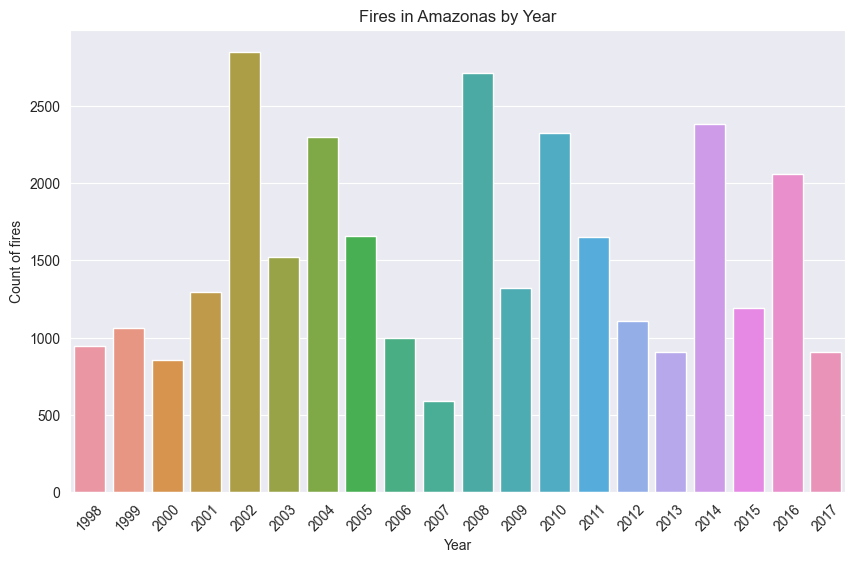

In [82]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x='year', y="number", data=amazonas_fires_year)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Count of fires")
plt.title("Fires in Amazonas by Year")

18. Display number of fires were reported in amazon (day-wise)

19. Find the total number of fires reported in 2015 and visualize data based on each ‘month’.

20. Find the average number of fires reported from highest to lowest (state-wise)

21. To find the state names where fires were reported in 'dec' month.